In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [141]:
df = pd.read_csv("D:\\DESKTOP\\Pattern recognition\\Regression_on_Abalone_dataset\\Abalone dataset\\abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [142]:
#data Preprocessing
abalone_data = pd.get_dummies(df, columns=['Sex'])
abalone_data = abalone_data.apply(pd.to_numeric, errors='coerce')
abalone_data.dropna(inplace=True)
X = abalone_data.drop(columns=['Rings']).values
y = abalone_data['Rings'].values.reshape(-1, 1)

In [143]:
print(abalone_data.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15  False  False   True  
1         0.070      7  False  False   True  
2         0.210      9   True  False  False  
3         0.155     10  False  False   True  
4         0.055      7  False   True  False  


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.array(X, dtype=float)  # Convert to numpy array with float type
        y = np.array(y, dtype=float)
        X = np.c_[np.ones(X.shape[0]), X]  # Adding intercept term
        print("X dtype:", X.dtype)
        print("y dtype:", y.dtype)
        print("X shape:", X.shape)
        print("y shape:", y.shape)
        XTX = np.dot(X.T, X)
        print("XTX shape:", XTX.shape)
        XTX_inv = np.linalg.inv(XTX)
        print("XTX_inv shape:", XTX_inv.shape)
        XTy = np.dot(X.T, y)
        print("XTy shape:", XTy.shape)
        self.coefficients = np.dot(XTX_inv, XTy)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Adding intercept term
        return np.dot(X, self.coefficients)

In [146]:
model = LinearRegression()
model.fit(X_train, y_train)

X dtype: float64
y dtype: float64
X shape: (3341, 11)
y shape: (3341, 1)
XTX shape: (11, 11)
XTX_inv shape: (11, 11)
XTy shape: (11, 1)


In [147]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

X dtype: float64
y dtype: float64
X shape: (3341, 11)
y shape: (3341, 1)
XTX shape: (11, 11)
XTX_inv shape: (11, 11)
XTy shape: (11, 1)


In [148]:
train_rmse = np.sqrt(np.mean((y_train_pred - y_train) ** 2))
test_rmse = np.sqrt(np.mean((y_test_pred - y_test) ** 2))
print("Linear Regression (Implemented from Scratch) Results:")
print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")

Linear Regression (Implemented from Scratch) Results:
Training RMSE: 28.38604727410967
Testing RMSE: 27.447472962514897


In [149]:
#Ridge regression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


In [150]:
alphas = np.logspace(-3, 3, 10)
ridge_rmse = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_test_pred_ridge = ridge_model.predict(X_test)
    ridge_rmse.append(np.sqrt(np.mean((y_test_pred_ridge - y_test) ** 2)))


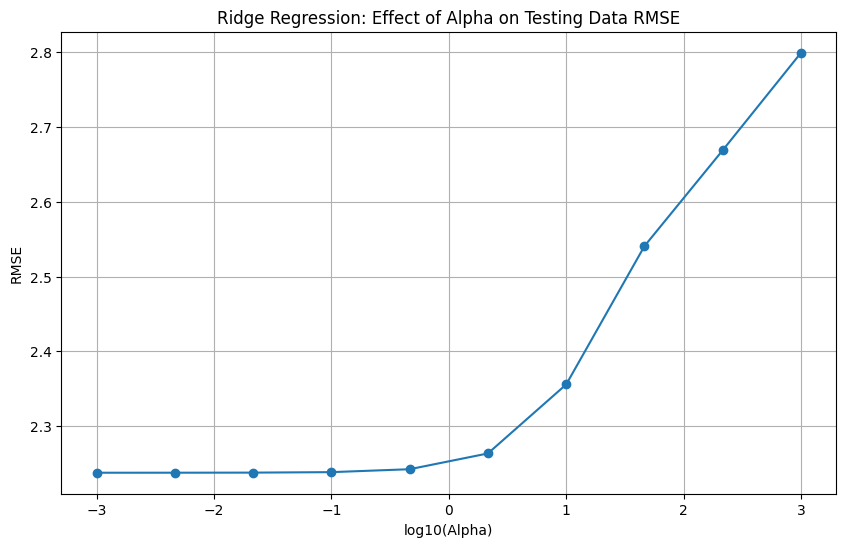

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), ridge_rmse, marker='o')
plt.xlabel('log10(Alpha)')
plt.ylabel('RMSE')
plt.title('Ridge Regression: Effect of Alpha on Testing Data RMSE')
plt.grid(True)
plt.show()

In [152]:
best_alpha_ridge = alphas[np.argmin(ridge_rmse)]
best_ridge_model = Ridge(alpha=best_alpha_ridge)
best_ridge_model.fit(X_train, y_train)
ridge_coefficients = best_ridge_model.coef_


In [153]:
print("Ridge Regression Results:")
print(f"Best Alpha: {best_alpha_ridge}")
print(f"Coefficients: {ridge_coefficients}")

Ridge Regression Results:
Best Alpha: 0.001
Coefficients: [[ -0.29688398  11.24671208   8.09620299   9.36998881 -20.16566223
  -10.66723044   8.3432274    0.25167453  -0.57848757   0.32681305]]


In [154]:
#Lasso Regression
from sklearn.linear_model import Lasso


In [155]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.alpha_


c:\Users\wajid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


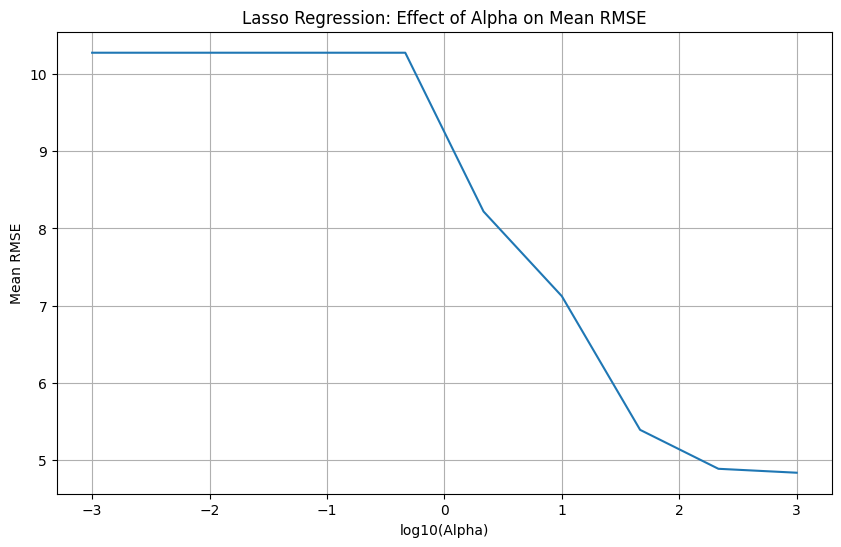

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), lasso_cv.mse_path_.mean(axis=1))
plt.xlabel('log10(Alpha)')
plt.ylabel('Mean RMSE')
plt.title('Lasso Regression: Effect of Alpha on Mean RMSE')
plt.grid(True)
plt.show()

In [157]:
best_lasso_model = Lasso(alpha=best_alpha_lasso)
best_lasso_model.fit(X_train, y_train)
lasso_coefficients = best_lasso_model.coef_

In [158]:
print("Lasso Regression Results:")
print(f"Best Alpha: {best_alpha_lasso}")
print(f"Coefficients: {lasso_coefficients}")

Lasso Regression Results:
Best Alpha: 0.001
Coefficients: [  0.          10.44535663   6.74592122   8.61280194 -19.39301347
  -8.83981434   9.03641293  -0.          -0.84583421   0.06774797]


In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso


In [160]:
ridge_params = {'alpha': np.logspace(-3, 3, 10)}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_alpha_ridge_grid = ridge_grid.best_params_['alpha']

In [161]:
best_ridge_model_grid = Ridge(alpha=best_alpha_ridge_grid)
best_ridge_model_grid.fit(X_train, y_train)
ridge_coefficients_grid = best_ridge_model_grid.coef_

print("Ridge Regression with GridSearchCV Results:")
print(f"Best Alpha: {best_alpha_ridge_grid}")
print(f"Coefficients: {ridge_coefficients_grid}")


Ridge Regression with GridSearchCV Results:
Best Alpha: 0.46415888336127775
Coefficients: [[  1.95996929   8.07034739   6.86174188   8.01539628 -18.62875483
   -8.45783363   9.62983073   0.26764849  -0.59896431   0.33131583]]


In [162]:
lasso_params = {'alpha': np.logspace(-3, 3, 10)}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_alpha_lasso_grid = lasso_grid.best_params_['alpha']

In [163]:
best_lasso_model_grid = Lasso(alpha=best_alpha_lasso_grid)
best_lasso_model_grid.fit(X_train, y_train)
lasso_coefficients_grid = best_lasso_model_grid.coef_

print("Lasso Regression with GridSearchCV Results:")
print(f"Best Alpha: {best_alpha_lasso_grid}")
print(f"Coefficients: {lasso_coefficients_grid}")

Lasso Regression with GridSearchCV Results:
Best Alpha: 0.001
Coefficients: [  0.          10.44535663   6.74592122   8.61280194 -19.39301347
  -8.83981434   9.03641293  -0.          -0.84583421   0.06774797]


In [164]:
print("Comparing Coefficients:")
print("Ridge Regression:")
print("Coefficients from Q1.II.a:", ridge_coefficients)
print("Coefficients from GridSearchCV:", ridge_coefficients_grid)

print("\nLasso Regression:")
print("Coefficients from Q1.II.a:", lasso_coefficients)
print("Coefficients from GridSearchCV:", lasso_coefficients_grid)

Comparing Coefficients:
Ridge Regression:
Coefficients from Q1.II.a: [[ -0.29688398  11.24671208   8.09620299   9.36998881 -20.16566223
  -10.66723044   8.3432274    0.25167453  -0.57848757   0.32681305]]
Coefficients from GridSearchCV: [[  1.95996929   8.07034739   6.86174188   8.01539628 -18.62875483
   -8.45783363   9.62983073   0.26764849  -0.59896431   0.33131583]]

Lasso Regression:
Coefficients from Q1.II.a: [  0.          10.44535663   6.74592122   8.61280194 -19.39301347
  -8.83981434   9.03641293  -0.          -0.84583421   0.06774797]
Coefficients from GridSearchCV: [  0.          10.44535663   6.74592122   8.61280194 -19.39301347
  -8.83981434   9.03641293  -0.          -0.84583421   0.06774797]
